**Задача классификации (classification)** — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является категориальным.

**Логистическая регрессия (Logistic Regression)** — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.
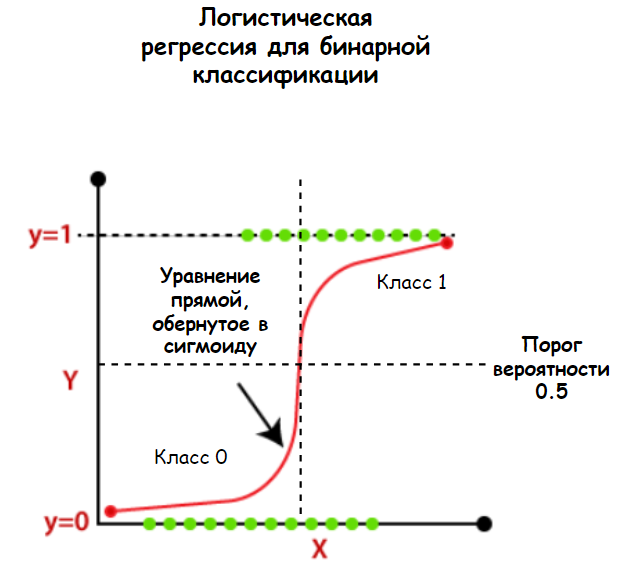

In [86]:
x1 = 0.3
x2 = 3
z = 1 + 5 * x1 - 0.3 * x2
1/(1 + 2.7 ** (-z))

0.8305039182313306

In [87]:
1/0.32 - 1

2.125

In [88]:
2,7

(2, 7)

e — основание натурального логарифма, математическая константа, иррациональное и трансцендентное число. Приблизительно равно 2,71828. Иногда число 
�
e называют числом Эйлера или числом Непера. Обозначается строчной латинской буквой «e».

In [89]:
e =  2,71828

### ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ В SKLEARN

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly 
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")

#%matplotlib inline
#plt.style.use('seaborn')

In [91]:
diabetes_data = pd.read_csv("data/diabetes_cleaned.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


- Pregnancies — количество беременностей;
- Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе;
- BloodPressure — диастолическое артериальное давление (мм рт. ст.);
- SkinThickness — толщина кожной складки трицепса (мм);
- BMI — индекс массы тела (вес в кг рост в м);
- DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости);
- Age — возраст;
- Outcome — наличие диабета (0 — нет, 1 — да), целевой признак.

In [92]:
fig = px.imshow(
    diabetes_data.corr(),
    text_auto=True,
    height=1000,
    width=1000
)
fig.show()

In [93]:
fig1 = px.scatter(
    data_frame=diabetes_data,
    y="BMI",
    x="Glucose",
    color="Outcome"
)
fig1.show()

In [94]:
diabetes_data["Outcome"].value_counts()

0    493
1    264
Name: Outcome, dtype: int64

### Основные параметры LogisticRegression

- **random_state** — число, на основе которого происходит генерация случайных чисел.
- **penalty** — метод регуляризации. Возможные значения:
  - **'l1'** — L1-регуляризация;
  - **'l2'** — L2-регуляризация (используется по умолчанию);
  - **'elasticnet'** — эластичная сетка (L1+L2);
  - **'None'** — отсутствие регуляризации.
- **C** — коэффициент обратный коэффициенту регуляризации, то есть равен . Чем больше C, тем меньше регуляризация. По умолчанию C=1, тогда α=1.
- **solver** — численный метод оптимизации функции потерь logloss, может быть:
  - **'sag**' — стохастический градиентный спуск (нужна стандартизация/нормализация);
  - **'saga'** — модификация предыдущего, которая поддерживает работу с негладкими функциями (нужна стандартизация/нормализация);
  - **'newton-cg'** — метод Ньютона с модификацией сопряжённых градиентов (не нужна стандартизация/нормализация);
  - **'lbfgs'** — метод Бройдена — Флетчера — Гольдфарба — Шанно (не нужна стандартизация/нормализация; используется по умолчанию, так как из всех методов теоретически обеспечивает наилучшую сходимость);
  - **'liblinear'** — метод покоординатного спуска (не нужна стандартизация/нормализация).
- **max_iter** — максимальное количество итераций, выделенных на сходимость.

In [95]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']
#Логистическая регрессия — линейная модель, поэтому она находится в уже знакомом нам модуле linear_model из библиотеки sklearn.

from sklearn import linear_model #линейные модели

In [96]:
#Создаём объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минимизируя logloss
log_reg_2d.fit(X, y)
#Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg_2d.intercept_)) #свободный член w0
print('w1, w2: {}'.format(log_reg_2d.coef_)) #остальные параметры модели w1, w2, ..., wm


w0: [-8.24898965]
w1, w2: [[0.03779275 0.0875742 ]]


Как нам сделать предсказание вероятности наличия диабета у пациента?

Мы должны подставить значения факторов в уравнение разделяющей плоскости, а затем результат подставить в функцию сигмоиды. Как хорошо, что для этого есть метод predict_proba().

Например, появился новый пациент с концентрацией глюкозы 180 мг/100мл и индексом массы тела в 51
к
г
м
. Мы хотим вычислить вероятность наличия/отсутствия диабета у данного пациента:

In [97]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = pd.DataFrame({'Glucose': [180], 'BMI': [51]})
#Делаем предсказание вероятностей:
y_new_proba_predict = log_reg_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 2)))

# Predicted probabilities: [[0.05 0.95]]

Predicted probabilities: [[0.05 0.95]]


In [98]:
x_new

,Glucose,BMI
0,180,51


Метод predict_proba() возвращает сразу две вероятности: первая соответствует вероятности принадлежности к классу 0 (диабета нет), а вторая — вероятности принадлежности к классу 1 (диабет есть). Заметьте, что в сумме две вероятности дают 1, что вполне логично, так как события взаимоисключающие.

Если мы хотим предсказать не вероятности, а сам класс (1 или 0), нам пригодится метод predict(). По умолчанию метод predict() относит объект к классу 1, если вероятность принадлежности к классу 1 > 0.5, и к классу 0, если эта вероятность < 0.5.

In [99]:
x_new = pd.DataFrame({'Glucose': [180], 'BMI': [51]})
#Делаем предсказание класса:
y_new_predict = log_reg_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))
# Predicted class: [1]

Predicted class: [1]


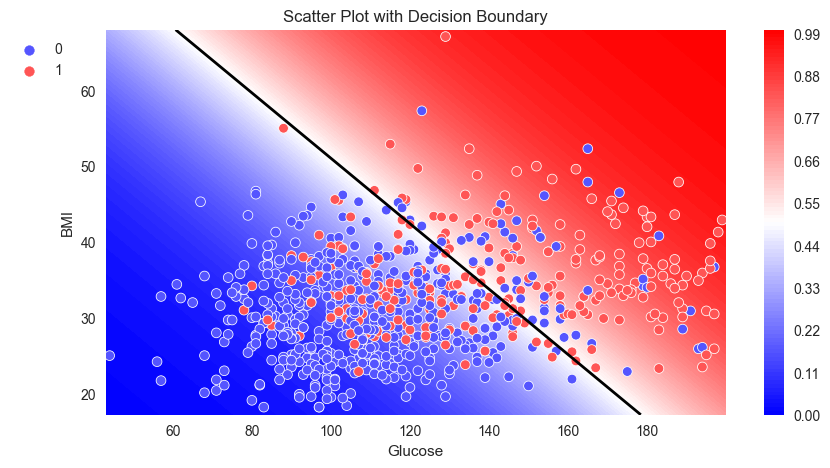

In [100]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))
#Теперь вызовем нашу функцию и посмотрим, как логистическая вероятность делит пространство на две части.

plot_probabilities_2d(X, y, log_reg_2d)

In [101]:
display(X)
display(y)
display(log_reg_2d)

,Glucose,BMI
0,98.0,34.0
1,112.0,35.7
2,108.0,30.8
3,107.0,24.6
4,136.0,29.9
...,...,...
752,139.0,28.6
753,96.0,22.4
754,101.0,45.6
755,141.0,42.4


0      0
1      0
2      0
3      0
4      0
      ..
752    0
753    0
754    1
755    1
756    0
Name: Outcome, Length: 757, dtype: int64

LogisticRegression(random_state=42)

In [102]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [103]:
#Создаём объект класса LogisticRegression
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минимизируя logloss
log_reg_full.fit(X, y)
#Делаем предсказание класса
y_pred = log_reg_full.predict(X)

In [104]:
#Создадим временную таблицу X
X_temp = X.copy()
#Добавим в эту таблицу результат предсказания
X_temp['Prediction'] = y_pred
X_temp.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Prediction
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0


In [106]:
task_data = pd.read_csv("data/task_data.csv")
task_data.head()

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


In [107]:
task_data = task_data.drop('SNo',axis=1)

In [108]:
X = task_data.drop('y',axis=1)
y = task_data['y']

In [109]:
log_reg_2d = linear_model.LogisticRegression(random_state=42)

log_reg_2d.fit(X,y)

print('w0: {}'.format(log_reg_2d.intercept_)) #свободный член w0
print('w1, w2: {}'.format(log_reg_2d.coef_))

w0: [0.55527306]
w1, w2: [[2.80998972 2.58775088]]


In [110]:
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

In [111]:
display(X)
display(y)
display(log_reg_2d)

,X_1,X_2
0,-0.869144,0.389310
1,-0.993467,-0.610591
2,-0.834064,0.239236
3,-0.136471,0.632003
4,0.403887,0.310784
...,...,...
95,0.531635,-0.479185
96,-0.650192,0.655303
97,0.985299,0.118333
98,-0.275289,0.005730


0     0.0
1     0.0
2     0.0
3     1.0
4     1.0
     ... 
95    1.0
96    1.0
97    1.0
98    1.0
99    1.0
Name: y, Length: 100, dtype: float64

LogisticRegression(random_state=42)

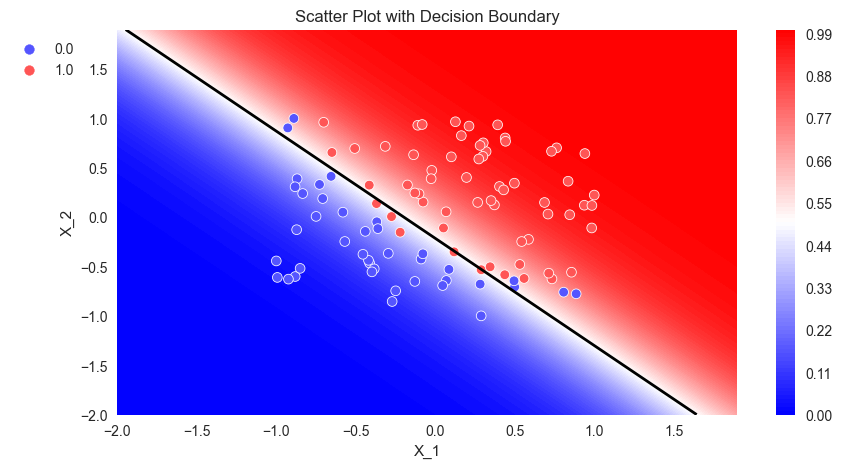

In [112]:
plot_probabilities_2d(X, y, log_reg_2d)